# Kidney Stone Prediction


## 1 - Preprocess the data:

- Examine the distribution of each feature to see if it is skewed or has any outliers.
- If there are outliers, decide how to handle them, such as by removing them or transforming the data.
- Standardize the data to make sure all the variables are in the same format.


In [66]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
# loading the dataset

df = pd.read_csv('dataset-kidney-stone.csv')
df.head()


,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [68]:
# removing the 1st unnamed column, which might be the index column

df.drop(df.columns[0], axis=1, inplace=True)
df.head()


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     int64  
 3   cond     90 non-null     float64
 4   urea     90 non-null     int64  
 5   calc     90 non-null     float64
 6   target   90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.0 KB


As we can see above, we have 90 rows, with no null values and all are numeric values.


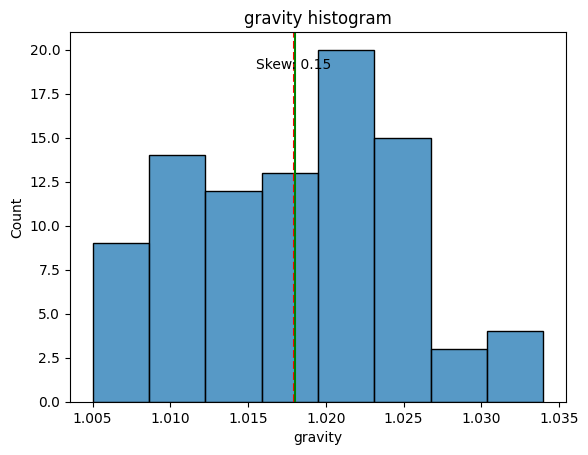

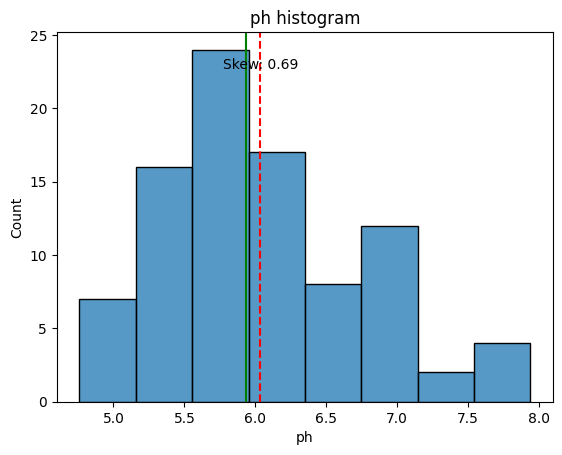

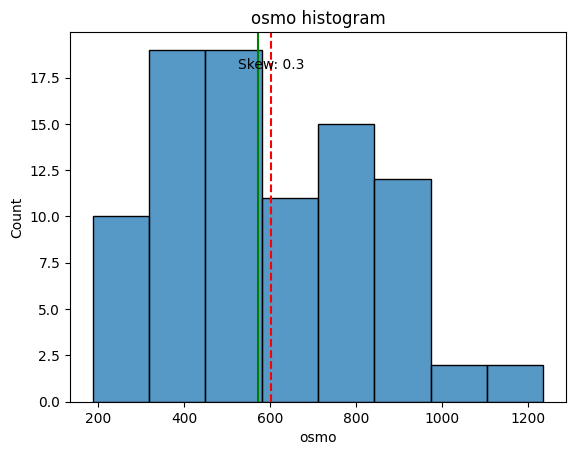

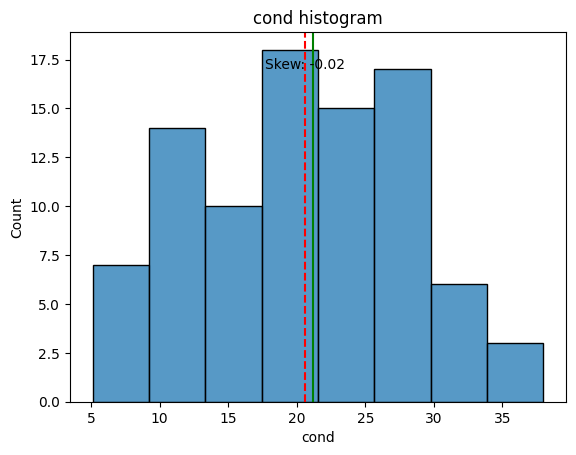

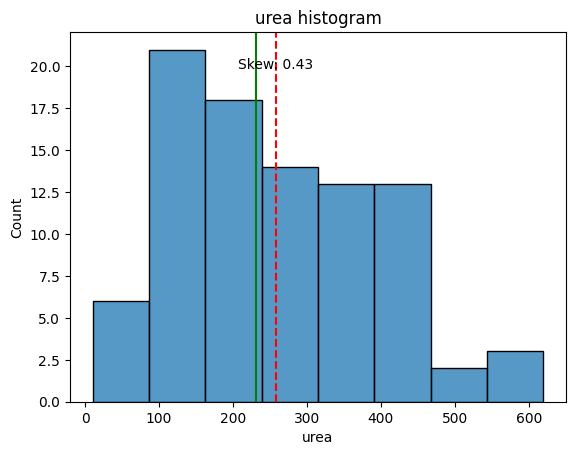

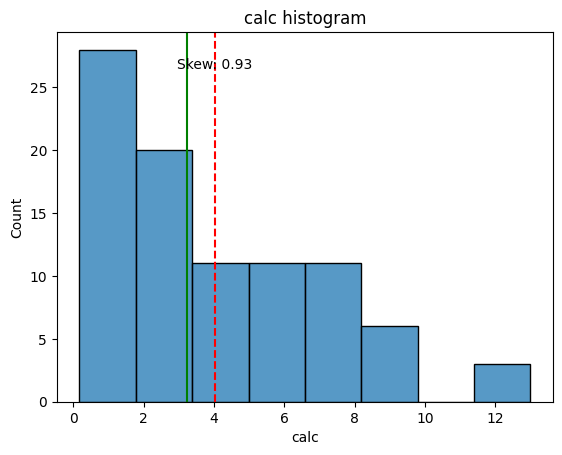

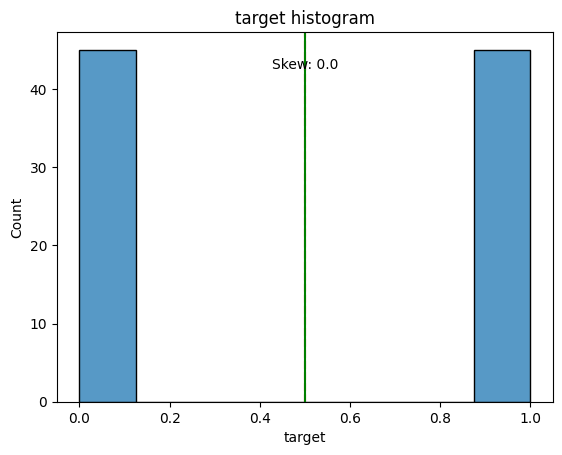

In [70]:
# Examine the distribution of each feature to see if it is skewed or has any outliers.

skewness = df.skew()

# Loop through each numeric column and plot a histogram with skewness value
for column in df.select_dtypes(include=['number']).columns:
    sns.histplot(data=df, x=column)
    plt.axvline(df[column].mean(), color='r', linestyle='--')
    plt.axvline(df[column].median(), color='g', linestyle='-')
    plt.text(df[column].mean(), plt.ylim()[1]*0.9, f'Skew: {round(skewness[column], 2)}', ha='center')
    plt.title(column + " histogram")
    plt.show()



As we can see in above plots, only ph and calc are skewed beyond threshold of 0.5. So we will apply log transformation on these two features.


In [71]:
# List of columns with skewed data beyond the threshold of 0.5

skewed_columns = skewness[abs(skewness) > 0.5].index.tolist()
skewed_columns


['ph', 'calc']

In [72]:
# Log Transformation of the skewed columns

df[skewed_columns] = np.log1p(df[skewed_columns])
df.head()


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,1.776646,725,14.0,443,1.238374,0
1,1.017,1.908060,577,20.0,296,1.702928,0
2,1.008,2.104134,321,14.9,101,1.211941,0
3,1.011,1.873339,408,12.6,224,1.147402,0
4,1.005,2.017566,187,7.5,91,0.770108,0


In [73]:
# checking the skewness again

df.skew()


gravity    0.152631
ph         0.453173
osmo       0.298551
cond      -0.016312
urea       0.433230
calc      -0.024415
target     0.000000
dtype: float64

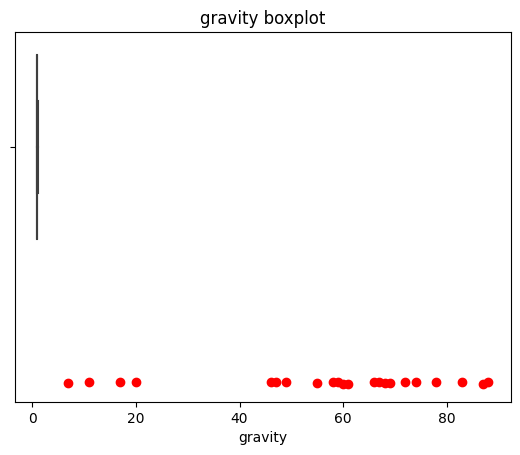

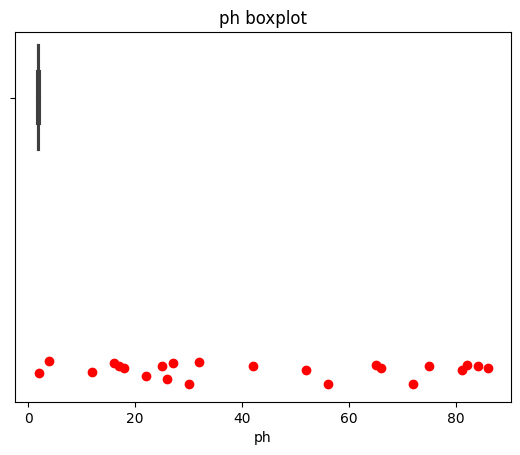

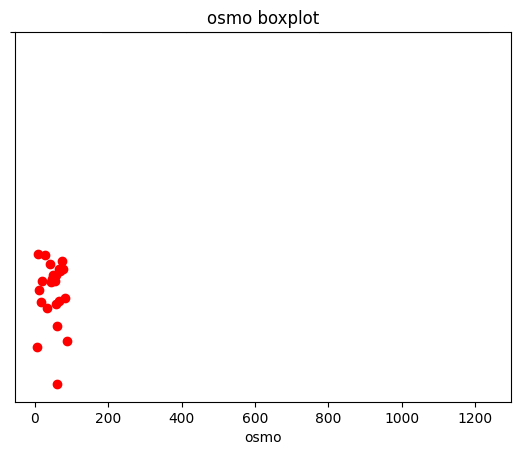

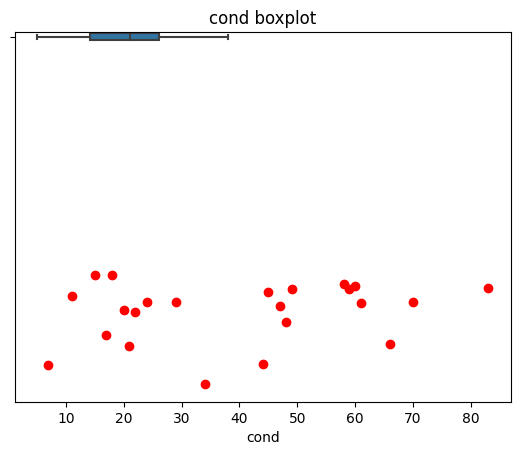

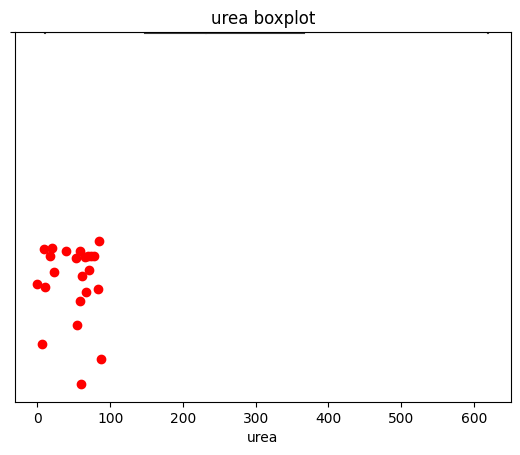

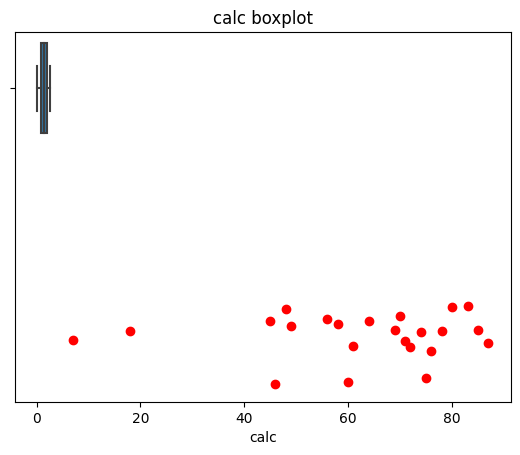

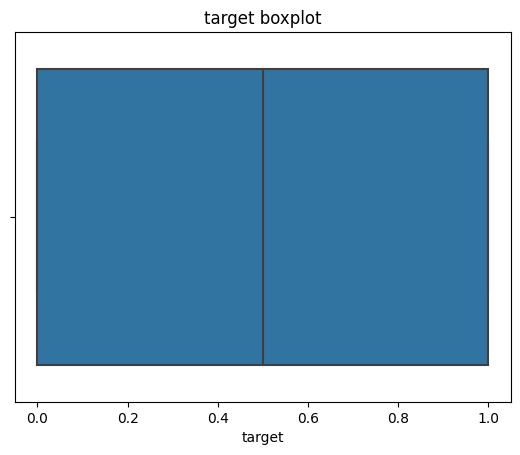

In [74]:
# checking for outliers and plotting boxplots with red dots as outliers

for column in df.select_dtypes(include=['number']).columns:
    sns.boxplot(data=df, x=column)
    plt.title(column + " boxplot")
    # red dots as outliers
    plt.plot(df[column][df[column] > df[column].quantile(0.75)] , marker="o", color="red", linestyle="None")
    plt.show()


In [75]:
# listing number of outliers in each column

for column in df.select_dtypes(include=['number']).columns:
    print(column + " has " + str(len(df[column][df[column] > df[column].quantile(0.75)])) + " outliers")


gravity has 22 outliers
ph has 23 outliers
osmo has 23 outliers
cond has 23 outliers
urea has 23 outliers
calc has 23 outliers
target has 0 outliers


In [76]:
# since we have less data, we will not remove the outliers but do square root transformation

df[skewed_columns] = np.sqrt(df[skewed_columns])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     int64  
 3   cond     90 non-null     float64
 4   urea     90 non-null     int64  
 5   calc     90 non-null     float64
 6   target   90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.0 KB


In [82]:
# checking the skewness again

df.skew()


gravity    0.152631
ph         0.392750
osmo       0.298551
cond      -0.016312
urea       0.433230
calc      -0.468273
target     0.000000
dtype: float64

In [88]:
# Standardize the data to make sure all the variables are in the same format

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()


,gravity,ph,osmo,cond,urea,calc,target
0,0.452076,-1.760408,0.517294,-0.869923,1.372682,-0.190380,-1.0
1,-0.141167,-0.379556,-0.106833,-0.081674,0.280776,0.509604,-1.0
2,-1.475961,1.595126,-1.186403,-0.751686,-1.167671,-0.233881,-1.0
3,-1.031030,-0.739638,-0.819518,-1.053848,-0.254035,-0.342129,-1.0
4,-1.920893,0.735160,-1.751491,-1.723860,-1.241951,-1.047470,-1.0


In [89]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     float64
 3   cond     90 non-null     float64
 4   urea     90 non-null     float64
 5   calc     90 non-null     float64
 6   target   90 non-null     float64
dtypes: float64(7)
memory usage: 5.0 KB


In [91]:
# list type of values in target column, since it got Standardized too

df_scaled['target'].unique()


array([-1.,  1.])

## 2 - Split the dataset
into training and testing sets using a reasonable ratio (e.g., 80:20). This will allow you to train your model on a portion of the data and evaluate its performance on unseen data.


In [93]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (72, 6), y_train shape: (72,)
X_test shape: (18, 6), y_test shape: (18,)


## 3 - Use extreme gradient boosting (XGBoost)
to predict the risk of kidney stones based on the input features. You can use a Python library such as xgboost to build and train the model.


## 4 - Train the XGBoost model
using the training set and evaluate its performance on the testing set using metrics such as mean absolute error (MAE), mean squared error (MSE), and R-squared (R^2) score.

- Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and the actual values. The lower the MAE value, the better the model's performance.
- Mean Squared Error (MSE) is the average of the squared differences between the predicted values and the actual values. The lower the MSE value, the better the model's performance.
- R-squared (R^2) score is a statistical measure that indicates how well the model fits the data. The higher the R^2 score, the better the model's performance.


## 5 - Set up a random search CV object
and define the hyperparameter grid to search over.

- Use the random search CV object to find the best hyperparameters for the XGBoost model using the training set.
- Train the XGBoost model with the best hyperparameters on the entire dataset (training + testing sets).
- Evaluate the performance of the XGBoost model with the best hyperparameters on the entire dataset using metrics such as MAE, MSE, and R^2 score.


## 6 - Interpret the results and draw conclusions about the
usefulness of XGBoost for predicting kidney stone risk and
the optimal hyperparameters for this task. If the model's
performance is good on both the training and testing sets,
you can conclude that XGBoost is a useful tool for predicting
kidney stone risk and the optimal hyperparameters found by
random search CV can be used for future predictions.